In [ ]:
# Importing the Car Features and MSRP dataset
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/MyDrive/CarFeaturesAndMSRP.csv'

import pandas as pd
df = pd.read_csv(filepath)

# Displaying the dataset
df.head()
df.info()
df.describe()

# Selecting only numerical columns for scaling
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df[numerical_cols]

# Scaling the values within the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols) # Use numerical_cols for column names
display(df_scaled.head())

# Displaying the car age
from datetime import datetime
current_year = datetime.now().year
df['Car Age'] = current_year - df['Year']
display(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  in

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,0.081228,0.784102,0.208466,-1.629557,-0.071930,-0.081587,1.637604,0.092174
1,0.081228,0.463552,0.208466,-1.629557,0.153737,-0.081587,1.637604,0.000919
2,0.081228,0.463552,0.208466,-1.629557,0.153737,0.029680,1.637604,-0.070620
3,0.081228,-0.177549,0.208466,-1.629557,0.153737,-0.192853,1.637604,-0.185416
4,0.081228,-0.177549,0.208466,-1.629557,0.153737,-0.192853,1.637604,-0.101399


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Car Age
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,14
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,14
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,14
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,14
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,14


            Feature  Coefficient
0              Year    45.741411
1         Engine HP   320.534585
2  Engine Cylinders  9889.675291
3   Number of Doors -4848.959842
4       highway MPG   364.574237
5          city mpg  1436.717274
6        Popularity    -4.064863
7           Car Age   -45.741411


Mounted at /content/drive
Model Evaluation on Test Data:
R² Score: 0.5288551757716107
Mean Squared Error: 2130051326.5483975
Root Mean Squared Error: 46152.47909428482

Model Coefficients:
Intercept: -294259.4746163953
Year: 91.4828
Engine HP: 320.5346
Engine Cylinders: 9889.6753
Number of Doors: -4848.9598
highway MPG: 364.5742
city mpg: 1436.7173
Popularity: -4.0649


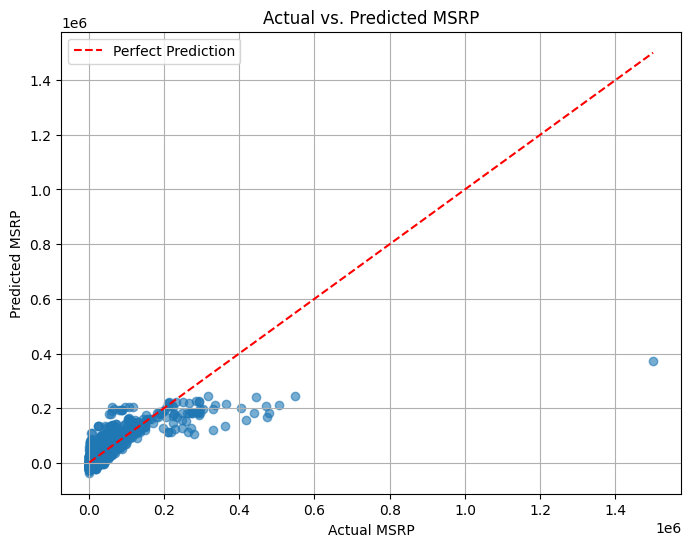

In [ ]:
# Imports for data handling, modeling, evaluation, and visualization
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Importing the Car Features and MSRP dataset
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/MyDrive/CarFeaturesAndMSRP.csv'

df = pd.read_csv(filepath)

# Convert MSRP to numeric
df['MSRP'] = pd.to_numeric(df['MSRP'], errors='coerce')

# Drop rows with NaNs
df.dropna(inplace=True)

# Select numeric columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Define x and y before scaling
x = df[numerical_cols.drop('MSRP')]
y = df['MSRP']

# Scale x only
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Model training
reg = LinearRegression()
reg.fit(x_scaled, y)

# Training/testing model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
reg.fit(x_train, y_train)


# Predict on test set
y_pred = reg.predict(x_test)

# 1. Model performance
print("Model Evaluation on Test Data:")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

# 2. Coefficients and intercept
print("\nModel Coefficients:")
print("Intercept:", reg.intercept_)

for feature, coef in zip(x.columns, reg.coef_):
    print(f"{feature}: {coef:.4f}")

# 3. Visualizing predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual MSRP")
plt.ylabel("Predicted MSRP")
plt.title("Actual vs. Predicted MSRP")
plt.legend()
plt.grid(True)
plt.show()

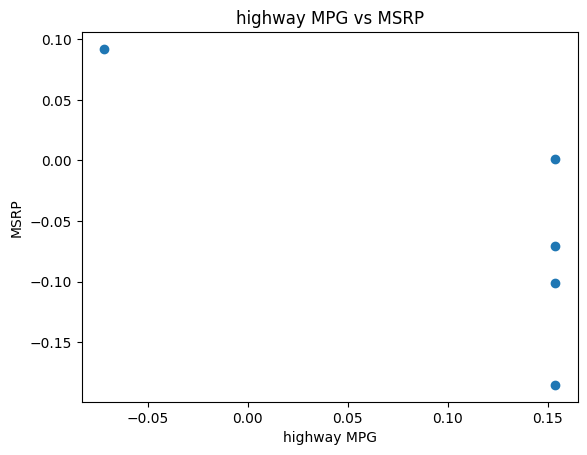

In [ ]:
# Scatterplot: highway MPG vs MSRP
plt.scatter(_df_4['highway MPG'], _df_4['MSRP'])
plt.xlabel('highway MPG')
plt.ylabel('MSRP')
plt.title('highway MPG vs MSRP')
plt.show()

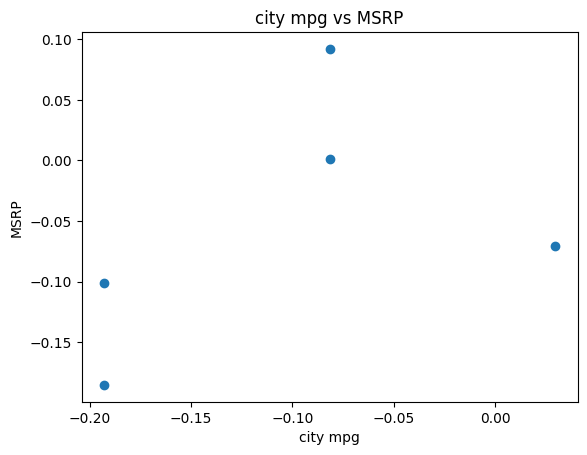

In [ ]:
# Scatterplot: city MPG vs MSRP
plt.scatter(_df_5['city mpg'], _df_5['MSRP'])
plt.xlabel('city mpg')
plt.ylabel('MSRP')
plt.title('city mpg vs MSRP')
plt.show()

In [ ]:
# Scatterplot: Popularity vs MSRP
plt.scatter(_df_6['Popularity'], _df_6['MSRP'])
plt.xlabel('Popularity')
plt.ylabel('MSRP')
plt.title('Popularity vs MSRP')
plt.show()

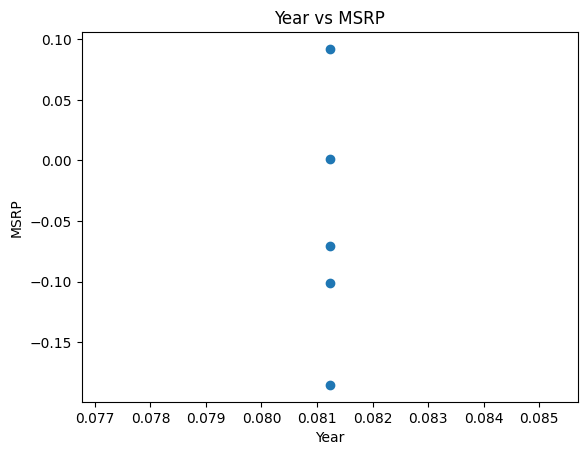

In [ ]:
# Scatterplot: Year vs MSRP
plt.scatter(_df_0['Year'], _df_0['MSRP'])
plt.xlabel('Year')
plt.ylabel('MSRP')
plt.title('Year vs MSRP')
plt.show()

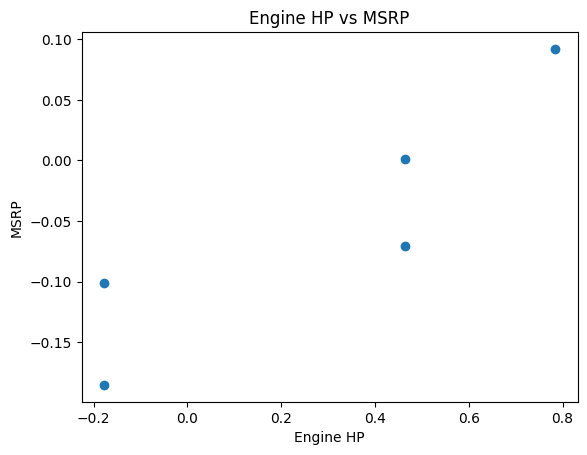

In [ ]:
# Scatterplot: Engine HP vs MSRP
plt.scatter(_df_1['Engine HP'], _df_1['MSRP'])
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.title('Engine HP vs MSRP')
plt.show()

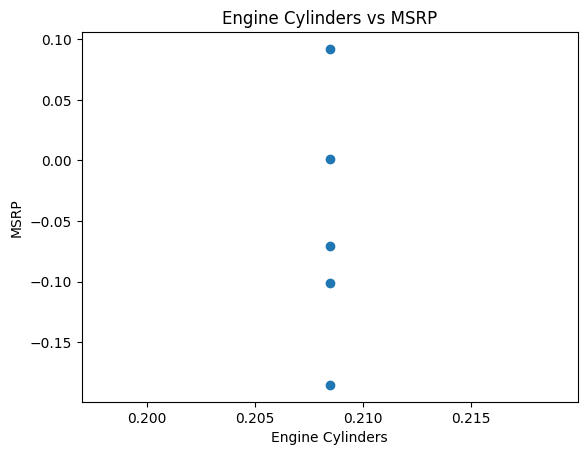

In [ ]:
# Scatterplot: Engine Cylinders vs MSRP
plt.scatter(_df_2['Engine Cylinders'], _df_2['MSRP'])
plt.xlabel('Engine Cylinders')
plt.ylabel('MSRP')
plt.title('Engine Cylinders vs MSRP')
plt.show()

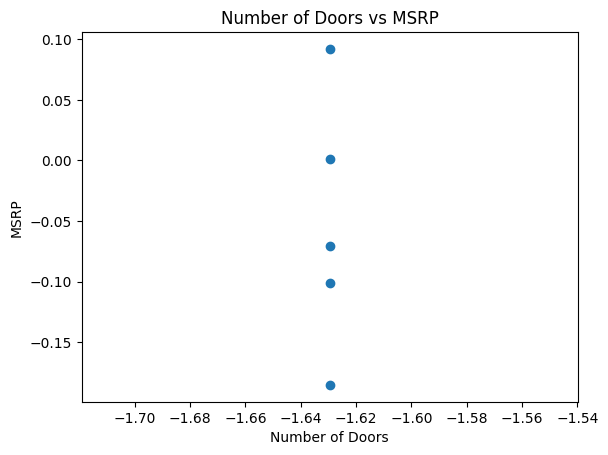

In [ ]:
# Scatterplot: Number of Doors vs MSRP
plt.scatter(_df_3['Number of Doors'], _df_3['MSRP'])
plt.xlabel('Number of Doors')
plt.ylabel('MSRP')
plt.title('Number of Doors vs MSRP')
plt.show()

# Documentation of the Car Features and MSRP Project

**Objective**: To predict car prices using features like engine size, fuel type, brand, and more.

**Methods**: data collection, data analysis, data visualization, and machine learning. Data was collected from a Kaggle dataset. The data was analyzed by extracting useful insights from it. The data was visualized through graphs and charts. Lastly, machine learning was used through feature engineering and training/testing the model.

**Results**: My model can explain about 53% of the variation in a vehicle's MSRP. This is high accuracy, relative to the features included in the dataset.

**Insights**: A car’s engine cylinders are its most valuable feature. City mpg is more valuable than highway mpg. The greater a car's popularity, the lower its value. Engine hp is slightly less significant than the highway mpg in terms  of pricing/value.